In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps
import tifffile as tf

In [2]:
data_src = r"D:\Downloads\Archive\drift_corrected.tif"
frame_rate = 80

In [3]:
# Get reference
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(data_src)
oog.sequence_manager.skip_frames = 0
oog.run()

ref = oog.sequence_manager.reference_sequence
rpr = oog.sequence_manager.reference_period

# Run with reference
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(data_src)
oog.sequence_manager.reference_sequence = ref
oog.sequence_manager.reference_period = rpr
oog.run()

# Get reference
oog2 = OG.BasicOpticalGating()
oog2.sequence_manager.set_source(data_src)
oog2.sequence_manager.skip_frames = 500
oog2.run()

ref = oog2.sequence_manager.reference_sequence
rpr = oog2.sequence_manager.reference_period

# Run with reference
oog2 = OG.BasicOpticalGating()
oog2.sequence_manager.set_source(data_src)
oog2.sequence_manager.reference_sequence = ref
oog2.sequence_manager.reference_period = rpr
oog2.run()

Setting source to D:\Downloads\Archive\drift_corrected.tif
Getting reference sequence
Reference period: 36.5615877990798; Reference indices: [5, 48]
Getting SADs
Getting phases
Setting source to D:\Downloads\Archive\drift_corrected.tif
Getting SADs
Getting phases
Setting source to D:\Downloads\Archive\drift_corrected.tif
Getting reference sequence
Reference period: 36.07168513198903; Reference indices: [7, 50]
Getting SADs
Getting phases
Setting source to D:\Downloads\Archive\drift_corrected.tif
Getting SADs
Getting phases


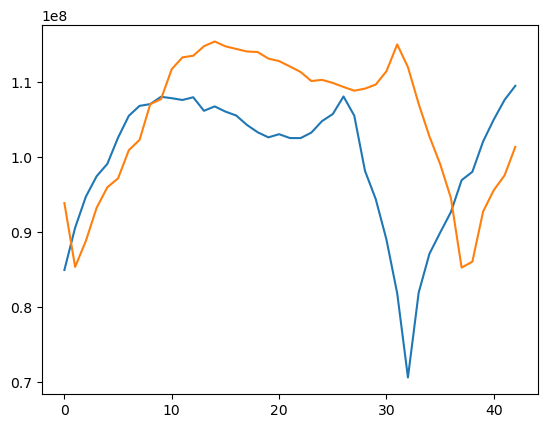

In [4]:
plt.plot(oog.sads[0])
plt.plot(oog2.sads[0])

In [5]:
sads = []
for i in range(oog.sequence_manager.reference_sequence.shape[0]):
    frame = oog.sequence_manager.reference_sequence[i]
    sads.append(jps.sad_with_references(frame, oog2.sequence_manager.reference_sequence))


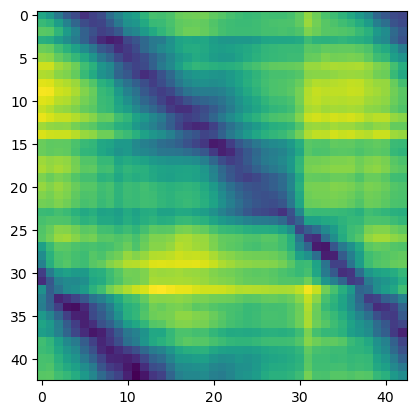

In [6]:
plt.imshow(sads)

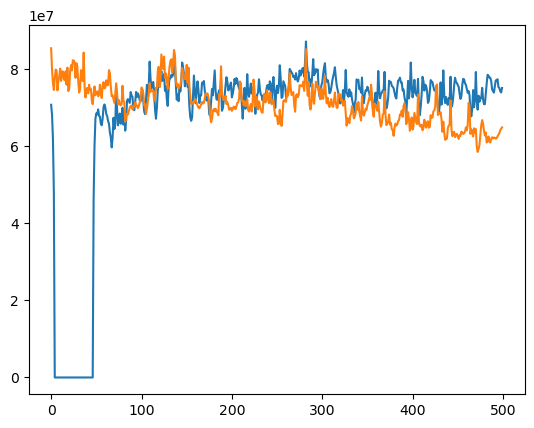

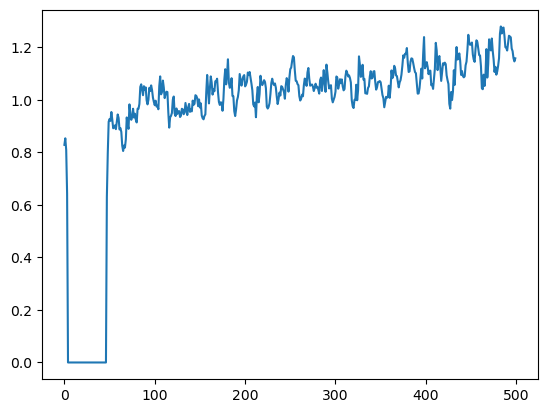

In [7]:
plt.plot(np.min(oog.sads[0:500], axis = 1))
plt.plot(np.min(oog2.sads[0:500], axis = 1))
plt.show()
plt.plot(np.min(oog.sads[0:500], axis = 1) / np.min(oog2.sads[0:500], axis = 1))
plt.show()

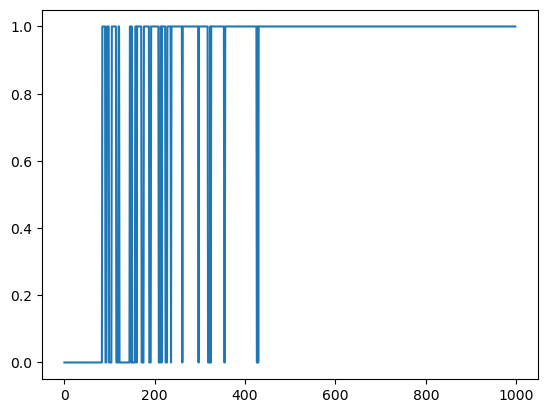

In [8]:
plt.plot(np.min(oog.sads, axis = 1) > np.min(oog2.sads, axis  =1))

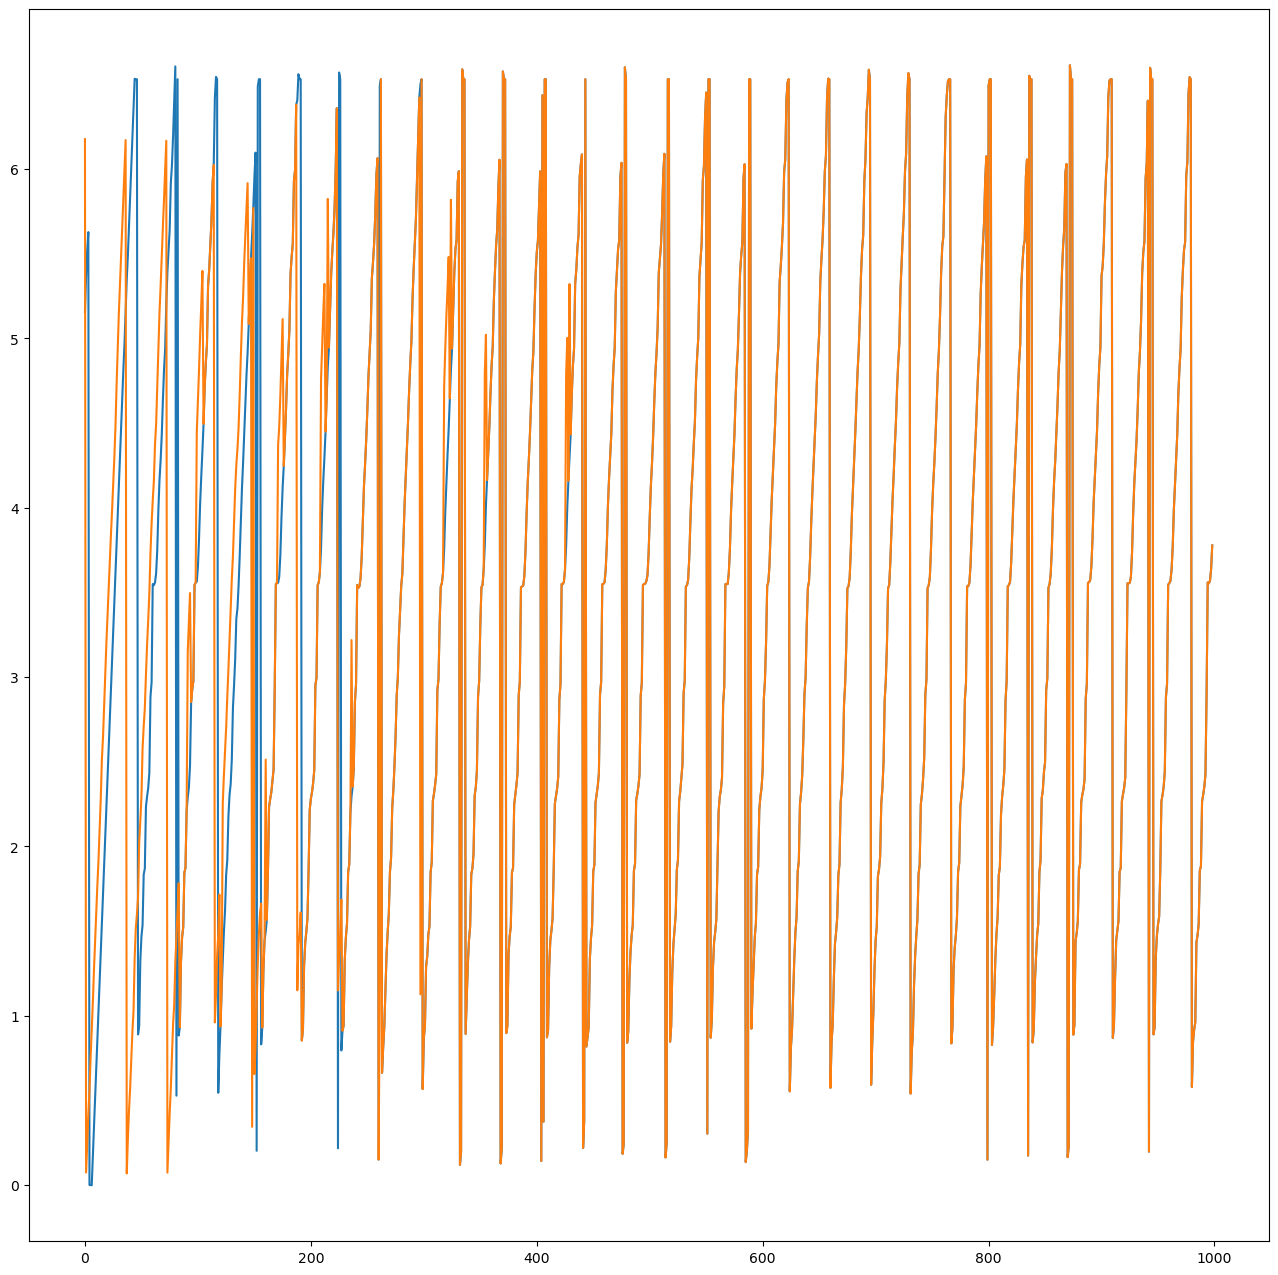

In [9]:
phases = oog.phases.copy()
phases[np.where(np.min(oog.sads, axis = 1) > np.min(oog2.sads, axis  =1))] = oog.phases[np.min(oog.sads, axis = 1) > np.min(oog2.sads, axis  =1)]
phases[np.where(np.min(oog.sads, axis = 1) < np.min(oog2.sads, axis  =1))] = oog2.phases[np.min(oog.sads, axis = 1) < np.min(oog2.sads, axis  =1)]
plt.figure(figsize = (16,16))
plt.plot(oog.phases)
plt.plot(phases)
plt.show()

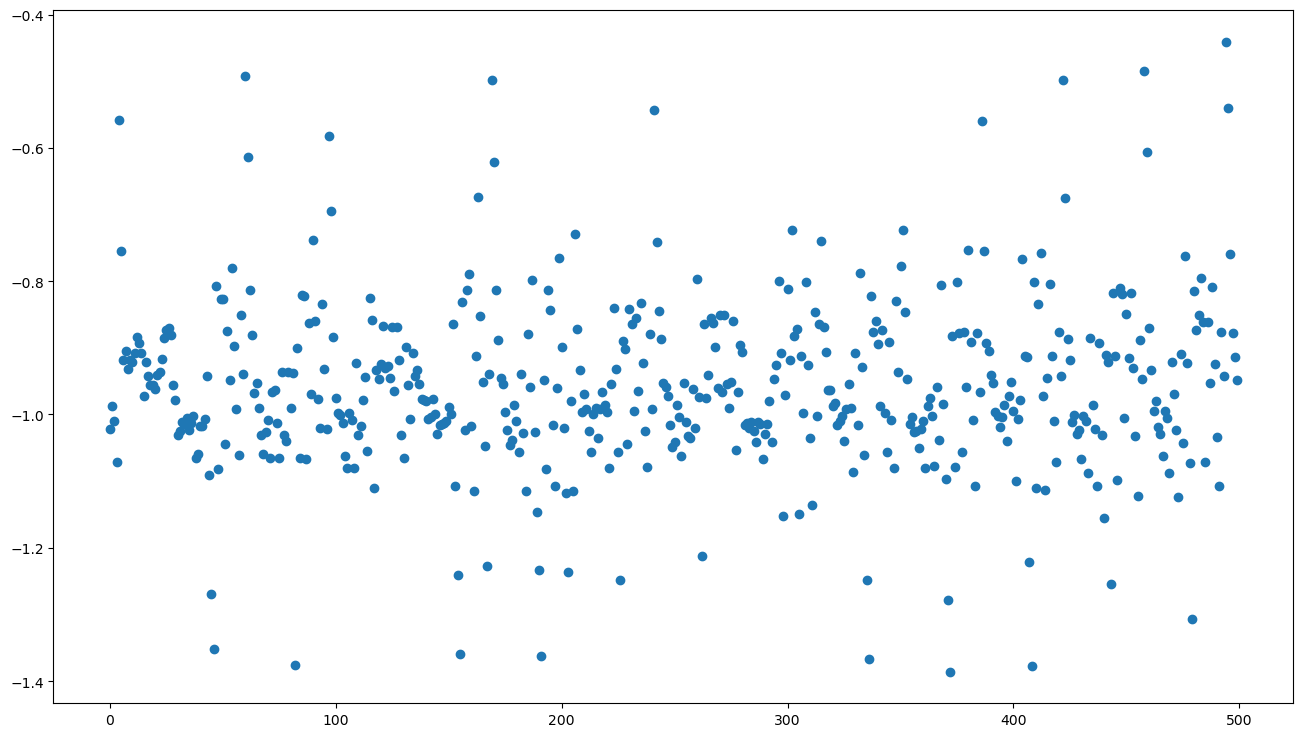

In [10]:
plt.figure(figsize = (16,9))
plt.scatter(range(500), oog.unwrapped_phases[0:500] - oog2.unwrapped_phases[0:500])
plt.show()